In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df = pd.read_csv('C:/Users/Ukrai/Desktop/Tesla3stats2.csv', sep='[;,]', engine='python')

In [2]:
df.head(1)

,FullName,Price,Auction,LotNumber,SellDate,ProductionDate,VIN,Condition,Engine,Milage,...,PrimaryDamage,SecondaryDamage,EstimatedValue,RepairCost,Gearbox,Color,DriveUnit,Fuel,Keys,Notes
0,Tesla Model 3 Long Range 2018 Black DUAL vin:...,9325,IAAI,28576045,15.02.2021,2018,5YJ3E1EB7JF069723,Stationary,DUAL MOTOR FR AC INDUCTION,26011 миль (Actual),...,Front and Rear,Не указано,NaN,Не указана,Unknown,Black,All Wheel Drive,Electric,Missing,Отсутствует


In [3]:
df.Gearbox.unique()#-.- i know that it can be only automatic sicvential gearbox in tesla... manual!?!?!?

array(['Unknown', 'Automatic', 'Manual', 'Ecvt Automatic'], dtype=object)

In [4]:
df.columns

Index(['FullName', 'Price', 'Auction', 'LotNumber', 'SellDate',
       'ProductionDate', 'VIN', 'Condition', 'Engine', 'Milage', 'Documents',
       'SellLocation', 'PrimaryDamage', 'SecondaryDamage', 'EstimatedValue',
       'RepairCost', 'Gearbox', 'Color', 'DriveUnit', 'Fuel', 'Keys', 'Notes'],
      dtype='object')

In [5]:
df1=df[['VIN','Price','Auction','ProductionDate','Condition','Engine','Milage','PrimaryDamage','SecondaryDamage','Color','DriveUnit','Keys']]
df1.head(1)

,VIN,Price,Auction,ProductionDate,Condition,Engine,Milage,PrimaryDamage,SecondaryDamage,Color,DriveUnit,Keys
0,5YJ3E1EB7JF069723,9325,IAAI,2018,Stationary,DUAL MOTOR FR AC INDUCTION,26011 миль (Actual),Front and Rear,Не указано,Black,All Wheel Drive,Missing


In [6]:
#df1.Keys.unique()
#df1.Condition.unique()
#df1.Engine.unique()-better to delete
#df1.DriveUnit.unique()

In [6]:
df1.Keys=df1.Keys.replace(['Missing','Present','Exempt'],['No','Yes','No'])
df1.Keys=df1.Keys.fillna('No')
df1.Condition=df1.Condition.replace(['Run And Drive','Stationary','Engine Start Program'],['Run and Drive','Enhanced Vehicles','Starts'])
df1.DriveUnit=df1.DriveUnit.replace('Rear-Wheel Drive','Rear Wheel Drive')
print('Done')

Done


In [7]:
df1=df1.drop_duplicates(subset=['VIN'])
df1=df1.drop(['VIN','Engine'], axis=1)
df1=df1.fillna(0).reset_index(drop=True)
qwe=0
for i in df1.Milage:
    qw = [int(w) for w in i.split() if w.isdigit()]
    if not qw:
        df1.at[qwe,'Milage']=float(0.0)
    else:
        df1.at[qwe,'Milage']=float(qw[0])
    qwe+=1
df1[:3]

,Price,Auction,ProductionDate,Condition,Milage,PrimaryDamage,SecondaryDamage,Color,DriveUnit,Keys
0,9325,IAAI,2018,Enhanced Vehicles,26011,Front and Rear,Не указано,Black,All Wheel Drive,No
1,27550,IAAI,2020,Run and Drive,1188,Front End,Не указано,White,Rear Wheel Drive,Yes
2,23800,Copart,2020,Run and Drive,385,Front End,Не указано,Black,All Wheel Drive,Yes


In [8]:
e=0
while e<len(df1.Milage):
    if df1.Milage[e] >=50000: df1.Milage.at[e]=50000
    elif df1.Milage[e] >=30000 and df1.Milage[e] <50000: df1.Milage.at[e]=30000
    elif df1.Milage[e] >=25000 and df1.Milage[e] <30000: df1.Milage.at[e]=25000
    elif df1.Milage[e] >=20000 and df1.Milage[e] <25000: df1.Milage.at[e]=20000
    elif df1.Milage[e] >=15000 and df1.Milage[e] <20000: df1.Milage.at[e]=15000
    elif df1.Milage[e] >=10000 and df1.Milage[e] <15000: df1.Milage.at[e]=10000
    elif df1.Milage[e] >=5000 and df1.Milage[e] <10000: df1.Milage.at[e]=5000
    else:df1.Milage.at[e]=5000
    e+=1
#df1.Milage

In [10]:
#FIXING UNIQUES*

In [9]:
df1.dtypes

Price               int64
Auction            object
ProductionDate      int64
Condition          object
Milage             object
PrimaryDamage      object
SecondaryDamage    object
Color              object
DriveUnit          object
Keys               object
dtype: object

In [10]:
df1.isna().mean() * 100

Price              0.0
Auction            0.0
ProductionDate     0.0
Condition          0.0
Milage             0.0
PrimaryDamage      0.0
SecondaryDamage    0.0
Color              0.0
DriveUnit          0.0
Keys               0.0
dtype: float64

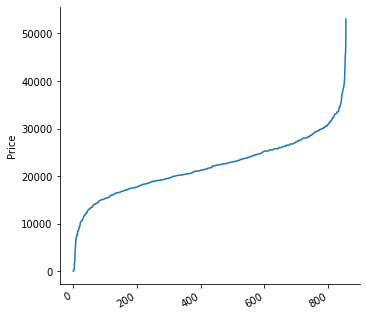

In [11]:
df2=df1.sort_values(by=['Price']).reset_index(drop=True)

g = sns.relplot(x=df2.index,y=df2.Price, kind="line", data=df2)
g.fig.autofmt_xdate()#с данного графика видно что до 15к купить хороший вариант не реально:D (ну, вообще это не есть проблема сейчас)

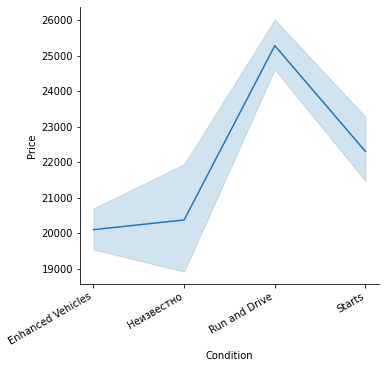

In [12]:
df2=df2.sort_values(by=['Price','Condition']).reset_index(drop=True)

g = sns.relplot(x=df2.Condition,y=df2.Price, kind="line", data=df2)
g.fig.autofmt_xdate()#авто значительно дороже если оно едет сразу с аукциона. Но если не едет, то что с ним случилось нужно разбираться в других параметрах. (если проблемы с батареей или с электромотором - не приятно... очень не приятно)
#данный график так же покажет нам относительную цену за состояние авто

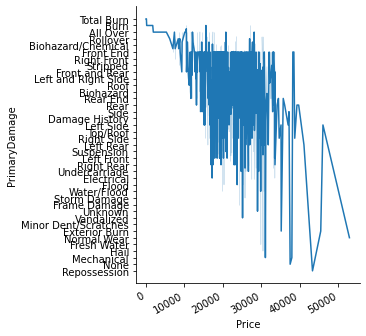

In [13]:
df2=df2.sort_values(by=['Price','PrimaryDamage']).reset_index(drop=True)

g = sns.relplot(x=df2.Price,y=df2.PrimaryDamage, kind="line", data=df2)
g.fig.autofmt_xdate()#график показывает в не красивом виде стоимость к урону авто. интересует больше битый в front,rear,roof,sides... и поскольку их много и цена у них не превышает 30к, то видно что это выбор народа
#сгоревшую можно купить за 100$

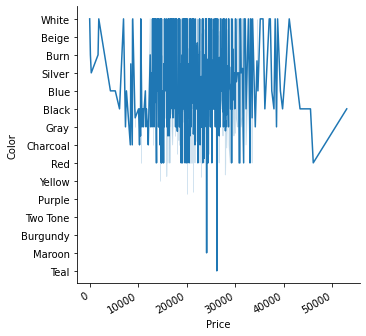

In [14]:
df2=df2.sort_values(by=['Price','Color']).reset_index(drop=True)

g = sns.relplot(x=df2.Price,y=df2.Color, kind="line", data=df2)
g.fig.autofmt_xdate()#хороший цвет "Burn". Большинство авто идёт в стандартных цветах тесла,что не подтвердило мою теорию о предпочтительности людей каких-то оттенков в выборе.

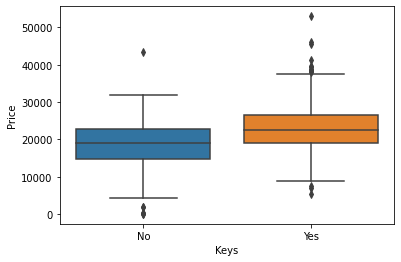

In [15]:
df2=df2.sort_values(by=['Price','Keys']).reset_index(drop=True)
sns.boxplot(x='Keys', y='Price', data=df2)
plt.show()

In [18]:
#Feature Engineering

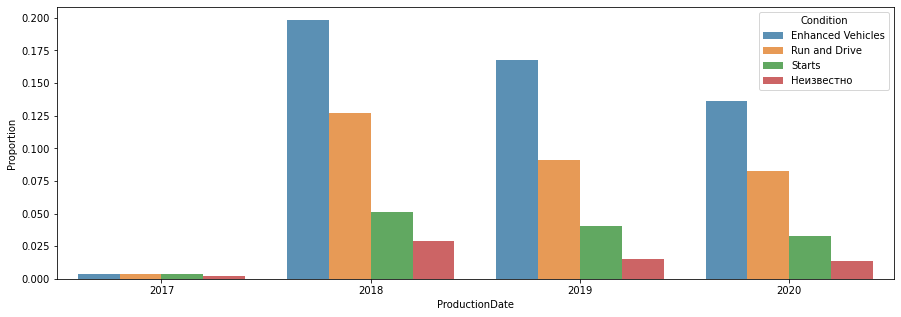

In [16]:
y="Proportion"
plt.figure(figsize=[15, 5])

df2[['ProductionDate', 'Condition']]\
    .value_counts(normalize=True)\
    .rename(y)\
    .reset_index()\
    .pipe((sns.barplot, "data"), x='ProductionDate', y='Proportion', hue='Condition', alpha=0.8);

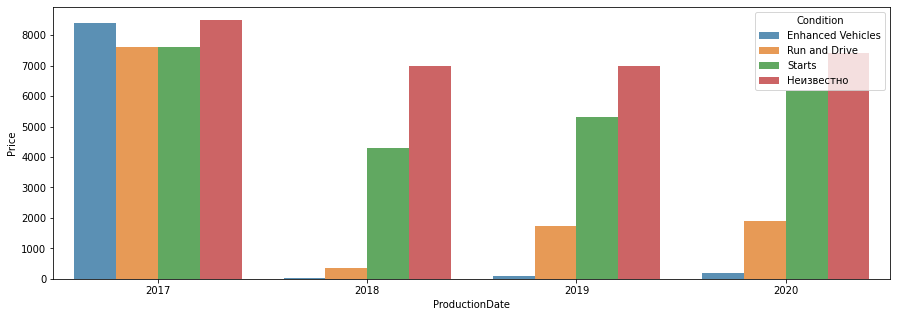

In [17]:
y="Proportion"
plt.figure(figsize=[15, 5])

df2[['ProductionDate', 'Condition']]\
    .value_counts(normalize=True)\
    .rename(y)\
    .reset_index()\
    .pipe((sns.barplot, "data"), x='ProductionDate', y=df2.Price, hue='Condition', alpha=0.8);

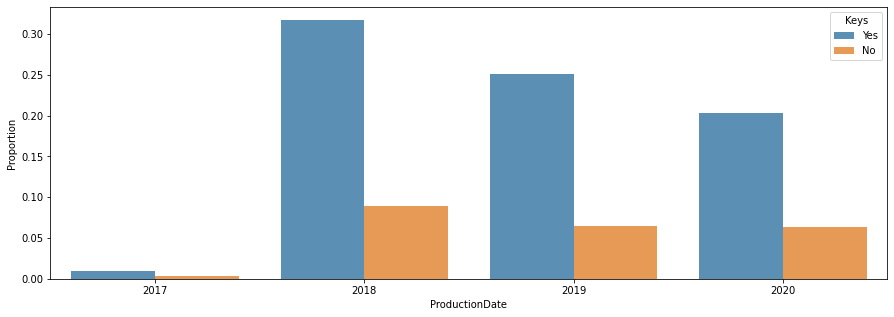

In [18]:
plt.figure(figsize=[15, 5])

df2[['ProductionDate', 'Keys']]\
    .value_counts(normalize=True)\
    .rename(y)\
    .reset_index()\
    .pipe((sns.barplot, "data"), x='ProductionDate', y='Proportion', hue='Keys', alpha=0.8);

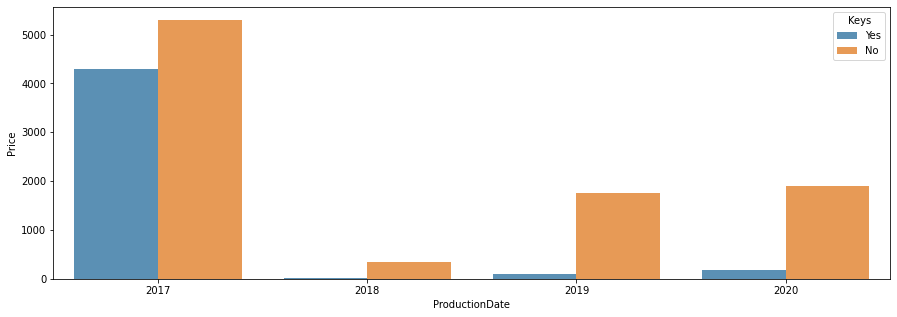

In [19]:
plt.figure(figsize=[15, 5])

df2[['ProductionDate', 'Keys']]\
    .value_counts(normalize=True)\
    .rename(y)\
    .reset_index()\
    .pipe((sns.barplot, "data"), x='ProductionDate', y=df2.Price, hue='Keys', alpha=0.8);

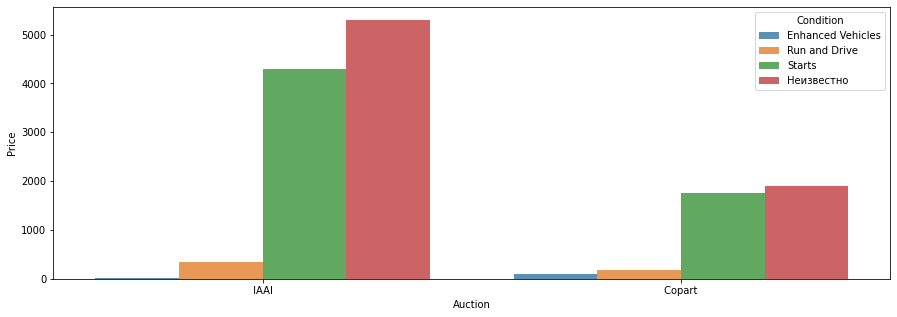

In [20]:
plt.figure(figsize=[15, 5])

df2[['Auction', 'Condition']]\
    .value_counts(normalize=True)\
    .rename(y)\
    .reset_index()\
    .pipe((sns.barplot, "data"), x='Auction', y=df2.Price, hue='Condition', alpha=0.8);

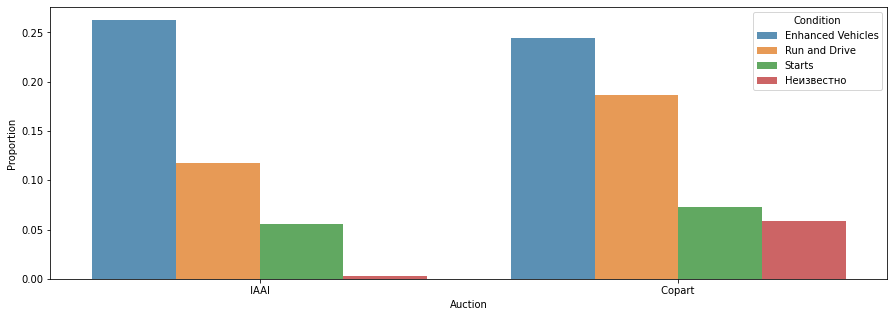

In [21]:
plt.figure(figsize=[15, 5])

df2[['Auction', 'Condition']]\
    .value_counts(normalize=True)\
    .rename(y)\
    .reset_index()\
    .pipe((sns.barplot, "data"), x='Auction', y='Proportion', hue='Condition', alpha=0.8);

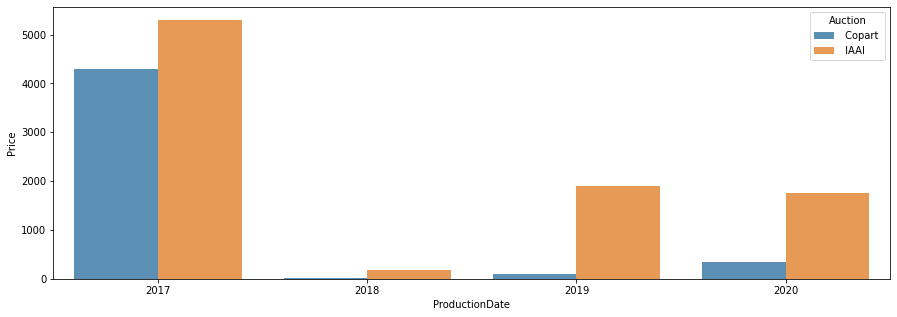

In [22]:
plt.figure(figsize=[15, 5])

df2[['ProductionDate', 'Auction']]\
    .value_counts(normalize=True)\
    .rename(y)\
    .reset_index()\
    .pipe((sns.barplot, "data"), x='ProductionDate', y=df2.Price, hue='Auction', alpha=0.8);
#ранок сам себя балансирует.. но IAAI вродь лучше авто попадаются.

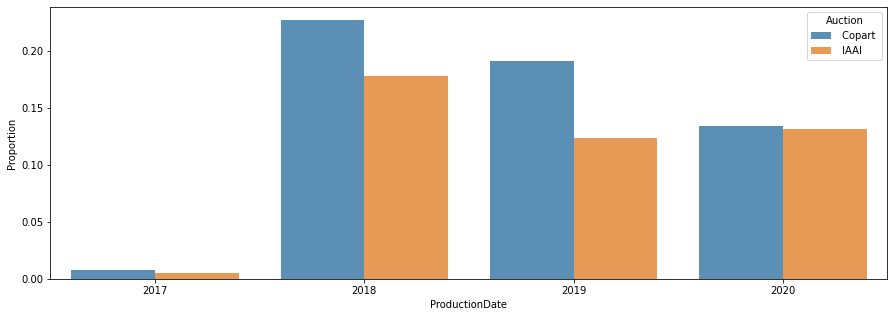

In [23]:
plt.figure(figsize=[15, 5])

df2[['ProductionDate', 'Auction']]\
    .value_counts(normalize=True)\
    .rename(y)\
    .reset_index()\
    .pipe((sns.barplot, "data"), x='ProductionDate', y='Proportion', hue='Auction', alpha=0.8);

In [24]:
df1[:3] #let start modeling

,Price,Auction,ProductionDate,Condition,Milage,PrimaryDamage,SecondaryDamage,Color,DriveUnit,Keys
0,9325,IAAI,2018,Enhanced Vehicles,25000,Front and Rear,Не указано,Black,All Wheel Drive,No
1,27550,IAAI,2020,Run and Drive,5000,Front End,Не указано,White,Rear Wheel Drive,Yes
2,23800,Copart,2020,Run and Drive,5000,Front End,Не указано,Black,All Wheel Drive,Yes


In [25]:
#need milage classification?
X = pd.get_dummies(df1, columns=df1.dtypes[df.dtypes == object].index).drop('Price', axis=1)
y = df1.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)#42?!10

In [26]:
TABLEcompare=pd.DataFrame(columns=['name','number'])

def CompareArray(preds):
    i=0
    tempone=[]
    while i<len(y_test):
        tempone.append(preds[i]-y_test[i])
        i+=1
    sumR=[]
    sumP=[]
    for i in tempone:
        if i >1000 or i<-1000:
            sumP.append(1)
        else: sumR.append(1)
    print(len(sumR),len(sumP))
    a=len(sumR)/len(sumP)*100
    return(a)

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train, y_train)
regressor.score(X, y)
y_pred = regressor.predict(X_test)

y_test=y_test.reset_index(drop=True)
TABLEcompare=TABLEcompare.append(pd.DataFrame([['linR',CompareArray(y_pred)]], columns=list(['name','number'])))
TABLEcompare

25 104


,name,number
0,linR,24.038462


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf=clf.fit(X_train,y_train)
y_pred_proba=clf.predict_proba(X_test)
y_pred=clf.predict(X_test)

TABLEcompare=TABLEcompare.append(pd.DataFrame([['DTree',CompareArray(y_pred)]], columns=list(['name','number'])))
TABLEcompare

22 107


,name,number
0,linR,24.038462
0,DTree,20.560748


In [29]:
from sklearn import svm
svmclf = svm.SVC()
clf.fit(X_train, y_train)
s_pred=clf.predict(X_test)

TABLEcompare=TABLEcompare.append(pd.DataFrame([['SVC',CompareArray(s_pred)]], columns=list(['name','number'])))
TABLEcompare

22 107


,name,number
0,linR,24.038462
0,DTree,20.560748
0,SVC,20.560748


In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
g_pred = gnb.fit(X_train, y_train).predict(X_test)

TABLEcompare=TABLEcompare.append(pd.DataFrame([['GausNB',CompareArray(g_pred)]], columns=list(['name','number'])))
TABLEcompare

16 113


,name,number
0,linR,24.038462
0,DTree,20.560748
0,SVC,20.560748
0,GausNB,14.159292


In [31]:
from sklearn.linear_model import SGDClassifier
sgdclf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5).fit(X_train, y_train)#loss="log"
r_pred=clf.predict(X_test)

TABLEcompare=TABLEcompare.append(pd.DataFrame([['SGD',CompareArray(r_pred)]], columns=list(['name','number'])))
TABLEcompare

22 107


,name,number
0,linR,24.038462
0,DTree,20.560748
0,SVC,20.560748
0,GausNB,14.159292
0,SGD,20.560748


In [32]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)#,feature_name = features, categorical_feature = categorical_features
params = {
'task': 'train'
, 'boosting_type': 'gbdt'
, 'objective': 'regression'
, 'metric': 'rmsle'
, 'min_data': 1
, 'verbose': -1
}
gbm = lgb.train(params, lgb_train, num_boost_round=50)
lg_pred = gbm.predict(X_train)

TABLEcompare=TABLEcompare.append(pd.DataFrame([['Lgb',CompareArray(lg_pred)]], columns=list(['name','number'])))
TABLEcompare

13 116


,name,number
0,linR,24.038462
0,DTree,20.560748
0,SVC,20.560748
0,GausNB,14.159292
0,SGD,20.560748
0,Lgb,11.206897


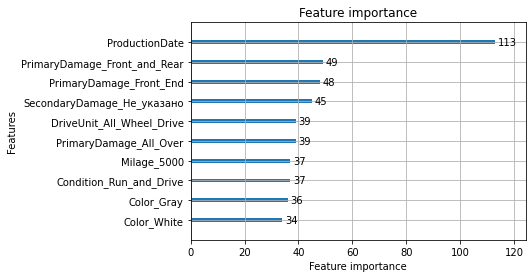

In [33]:
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

In [34]:
import xgboost as xgb
X_train=xgb.DMatrix(X_train, label=y_train)
X_test=xgb.DMatrix(X_test, label=y_test)
param = {'max_depth': 3, 'eta': 0.3}
evallist = [(X_test, 'eval'), (X_train, 'train')]
bst = xgb.train(param, X_train, 20)
xg_pred = bst.predict(X_test)

TABLEcompare=TABLEcompare.append(pd.DataFrame([['xgb',CompareArray(xg_pred)]], columns=list(['name','number'])))
TABLEcompare

34 95


,name,number
0,linR,24.038462
0,DTree,20.560748
0,SVC,20.560748
0,GausNB,14.159292
0,SGD,20.560748
0,Lgb,11.206897
0,xgb,35.789474


In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in df1.columns:
    if df1[i].dtypes=='object':
        le.fit(df1[i])
        encodedfeature=le.transform(df1[i])
        df1[i]=pd.DataFrame(encodedfeature)
df1.head()

,Price,Auction,ProductionDate,Condition,Milage,PrimaryDamage,SecondaryDamage,Color,DriveUnit,Keys
0,9325,1,2018,0,4,11,28,1,0,0
1,27550,1,2020,1,0,10,28,14,1,1
2,23800,0,2020,1,0,10,28,1,0,1
3,20400,0,2018,2,3,10,21,14,0,1
4,16500,0,2019,0,2,10,28,10,1,1


In [36]:
X=df1.drop('Price', axis=1).values
y=df1.Price.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

lgbt_train = lgb.Dataset(X_train,y_train,feature_name=['Auction','ProductionDate','Condition','Milage','PrimaryDamage','SecondaryDamage','Color','DriveUnit','Keys'],categorical_feature=['ProductionDate','Keys'])
paramst={'boosting_type':'gbdt','objective':'regression','metric':'rmsle','num_class':1,'min_data':1}#'num_class':len(df1.Price.unique()),
gbmt_model=lgb.train(paramst,lgbt_train,num_boost_round=50)#num_boost_round=100
predictiont=gbmt_model.predict(X_test)

TABLEcompare=TABLEcompare.append(pd.DataFrame([['LGBnew',CompareArray(predictiont)]], columns=list(['name','number'])))
TABLEcompare

[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 728, number of used features: 9
[LightGBM] [Info] Start training from score 21917.582418
26 103


,name,number
0,linR,24.038462
0,DTree,20.560748
0,SVC,20.560748
0,GausNB,14.159292
0,SGD,20.560748
0,Lgb,11.206897
0,xgb,35.789474
0,LGBnew,25.242718


In [37]:
#chill in xgboost tuning
#import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [38]:
from sklearn.metrics import mean_absolute_error
#import numpy as np
# Get predictions on the test set# "Learn" the mean from the training data
baseline_predictions = np.ones(y_test.shape) * np.mean(y_train)
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 4663.82


In [39]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}
params['eval_metric'] = "mae"
num_boost_round = 999
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

[17:58:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:15781.90918
[1]	Test-mae:11190.57812
[2]	Test-mae:8071.37793
[3]	Test-mae:5925.93359
[4]	Test-mae:4599.34717
[5]	Test-mae:3756.58545
[6]	Test-mae:3316.39380
[7]	Test-mae:3067.20972
[8]	Test-mae:2959.61377
[9]	Test-mae:2934.93945
[10]	Test-mae:2890.32129
[11]	Test-mae:2872.43530
[12]	Test-mae:2860.21753
[13]	Test-mae:2852.63696
[14]	Test-mae:2828.01587
[15]	Test-mae:2820.87891
[16]	Test-mae:2832.01367
[17]	Test-mae:2794.55420
[18]	Test-mae:2791.29517
[19]	Test-mae:2819.20019
[20]	Test-mae:2820.53784
[21]	Test-mae:2811.00928
[22]	Test-mae:2800.50879
[23]	Test-mae:2822.34009
[24]	Test-mae:2836.83520
[25]	Test-mae:2814.91235
[26]	Test-mae:2840.98877
[27]	Test-mae:2851.69922
[28]	Test-mae:2863.11084
Best MAE: 2791.30 with 19 rounds


In [40]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

cv_results['test-mae-mean'].min()

[17:58:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


3603.2353027999998

In [41]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[17:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 3628.3003906 for 10 rounds
CV with max_depth=9, min_child_weight=6
[17

In [42]:
params['max_depth'] = 9
params['min_child_weight'] = 7

In [44]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[17:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 3579.0702638000002 for 11 rounds
CV with subsample=1.0, colsample=0.9
[17

[17:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 3563.7518554000003 for 11 rounds
CV with subsample=0.8, colsample=0.8
[17:59:05] WARNING: C:/Users/Administrat

In [43]:
params['subsample'] = .7
params['colsample_bytree'] = .8

In [45]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'],early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

Wall time: 0 ns
CV with eta=0.3
[17:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 88.9 ms
	MAE 3649.84292 for 10 rounds

CV with eta=0.2
[17:59:11] WARNIN

In [46]:
params['eta'] = .01
params

{'max_depth': 9,
 'min_child_weight': 7,
 'eta': 0.01,
 'subsample': 0.7,
 'colsample_bytree': 0.7,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [47]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

[17:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:22095.81445
[1]	Test-mae:21880.82422
[2]	Test-mae:21664.05273
[3]	Test-mae:21452.26367
[4]	Test-mae:21241.34180
[5]	Test-mae:21033.60156
[6]	Test-mae:20826.60938
[7]	Test-mae:20624.59375
[8]	Test-mae:20422.12695
[9]	Test-mae:20222.19531
[10]	Test-mae:20026.92383
[11]	Test-mae:19830.91797
[12]	Test-mae:19637.81641
[13]	Test-mae:19444.12695
[14]	Test-mae:19254.69336
[15]	Test-mae:19064.24805
[16]	Test-mae:18880.90234
[17]	Test-mae:18702.24805
[18]	Test-mae:18519.20508
[19]	Test-mae:18338.15430
[20]	Test-mae:18163.76367
[21]	Test-mae:17984.57422
[22]	Test-mae:17812.87305
[23]	Test-mae:17641.22852
[24]	Test-mae:17468.33789
[25]	Test-mae:17301.58594
[26]	Test-mae:17140.68555
[27]	Test-mae:16973.59180
[28]	Test-mae:16811.11719
[29]	Test-mae:16652.63867
[30]	Test-mae:16490.83008
[31]	Test-mae:16332.69531
[

[310]	Test-mae:3041.23731
[311]	Test-mae:3037.54370
[312]	Test-mae:3033.87549
[313]	Test-mae:3031.34155
[314]	Test-mae:3026.02539
[315]	Test-mae:3022.95435
[316]	Test-mae:3019.45483
[317]	Test-mae:3018.50684
[318]	Test-mae:3014.64062
[319]	Test-mae:3011.96167
[320]	Test-mae:3008.33228
[321]	Test-mae:3006.51856
[322]	Test-mae:3003.63330
[323]	Test-mae:3000.37866
[324]	Test-mae:2998.69116
[325]	Test-mae:2998.72534
[326]	Test-mae:2994.37012
[327]	Test-mae:2992.33154
[328]	Test-mae:2989.53491
[329]	Test-mae:2987.08106
[330]	Test-mae:2985.22827
[331]	Test-mae:2982.17041
[332]	Test-mae:2978.69678
[333]	Test-mae:2977.87231
[334]	Test-mae:2974.98486
[335]	Test-mae:2971.22949
[336]	Test-mae:2968.98120
[337]	Test-mae:2966.64233
[338]	Test-mae:2964.46875
[339]	Test-mae:2961.97095
[340]	Test-mae:2961.13721
[341]	Test-mae:2960.21851
[342]	Test-mae:2959.27222
[343]	Test-mae:2958.66870
[344]	Test-mae:2955.55518
[345]	Test-mae:2953.11353
[346]	Test-mae:2950.72314
[347]	Test-mae:2950.73633
[348]	Test-m

In [48]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[17:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:22095.81445
[1]	Test-mae:21880.82422
[2]	Test-mae:21664.05273
[3]	Test-mae:21452.26367
[4]	Test-mae:21241.34180
[5]	Test-mae:21033.60156
[6]	Test-mae:20826.60938
[7]	Test-mae:20624.59375
[8]	Test-mae:20422.12695
[9]	Test-mae:20222.19531
[10]	Test-mae:20026.92383
[11]	Test-mae:19830.91797
[12]	Test-mae:19637.81641
[13]	Test-mae:19444.12695
[14]	Test-mae:19254.69336
[15]	Test-mae:19064.24805
[16]	Test-mae:18880.90234
[17]	Test-mae:18702.24805
[18]	Test-mae:18519.20508
[19]	Test-mae:18338.15430
[20]	Test-mae:18163.76367
[21]	Test-mae:17984.57422
[22]	Test-mae:17812.87305
[23]	Test-mae:17641.22852
[24]	Test-mae:17468.33789
[25]	Test-mae:17301.58594
[26]	Test-mae:17140.68555
[27]	Test-mae:16973.59180
[28]	Test-mae:16811.11719
[29]	Test-mae:16652.63867
[30]	Test-mae:16490.83008
[31]	Test-mae:16332.69531
[

[310]	Test-mae:3041.23731
[311]	Test-mae:3037.54370
[312]	Test-mae:3033.87549
[313]	Test-mae:3031.34155
[314]	Test-mae:3026.02539
[315]	Test-mae:3022.95435
[316]	Test-mae:3019.45483
[317]	Test-mae:3018.50684
[318]	Test-mae:3014.64062
[319]	Test-mae:3011.96167
[320]	Test-mae:3008.33228
[321]	Test-mae:3006.51856
[322]	Test-mae:3003.63330
[323]	Test-mae:3000.37866
[324]	Test-mae:2998.69116
[325]	Test-mae:2998.72534
[326]	Test-mae:2994.37012
[327]	Test-mae:2992.33154
[328]	Test-mae:2989.53491
[329]	Test-mae:2987.08106
[330]	Test-mae:2985.22827
[331]	Test-mae:2982.17041
[332]	Test-mae:2978.69678
[333]	Test-mae:2977.87231
[334]	Test-mae:2974.98486
[335]	Test-mae:2971.22949
[336]	Test-mae:2968.98120
[337]	Test-mae:2966.64233
[338]	Test-mae:2964.46875
[339]	Test-mae:2961.97095
[340]	Test-mae:2961.13721
[341]	Test-mae:2960.21851
[342]	Test-mae:2959.27222
[343]	Test-mae:2958.66870
[344]	Test-mae:2955.55518
[345]	Test-mae:2953.11353
[346]	Test-mae:2950.72314
[347]	Test-mae:2950.73633
[348]	Test-m

In [49]:
mean_absolute_error(best_model.predict(dtest), y_test)

2854.3056110707366

In [ ]:
best_model.save_model("my_model.model")

In [ ]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
#loaded_model.predict(dtest)

In [50]:
TABLEcompare=TABLEcompare.append(pd.DataFrame([['TunedXGB',CompareArray(best_model.predict(dtest))]], columns=list(['name','number'])))
TABLEcompare

24 105


,name,number
0,linR,24.038462
0,DTree,20.560748
0,SVC,20.560748
0,GausNB,14.159292
0,SGD,20.560748
0,Lgb,11.206897
0,xgb,35.789474
0,LGBnew,25.242718
0,TunedXGB,22.857143


In [85]:
omg=0
while omg<len(y_test):
    print(best_model.predict(dtest)[omg]-y_test[omg])
    omg+=1

3703.439453125
-361.779296875
-1388.021484375
-3155.703125
-6359.263671875
1131.333984375
1530.345703125
448.796875
-7231.078125
-460.400390625
-185.119140625
106.623046875
2817.37890625
3725.134765625
1895.4765625
-4359.720703125
2611.03125
-949.06640625
-734.2734375
2056.017578125
-3035.876953125
2388.41796875
-2688.09375
-3499.88671875
1140.45703125
4205.109375
-4050.19921875
-1479.984375
3049.4375
818.486328125
3190.072265625
-1290.0673828125
3051.84375
1787.578125
2095.404296875
-9015.2734375
-3626.041015625
5611.287109375
2909.109375
1360.189453125
962.66796875
4717.3046875
-9180.029296875
-1171.810546875
-606.3046875
-2268.740234375
847.599609375
958.07421875
-1079.984375
-921.23828125
2854.5859375
-3309.953125
2715.71875
-1827.126953125
-6769.177734375
3893.083984375
-73.1767578125
1480.171875
-4546.3671875
1012.201171875
3331.642578125
-3878.736328125
-2697.1875
3440.3359375
-2183.546875
808.15234375
-3343.884765625
54.53515625
1631.205078125
1294.25390625
-1966.1044921875
-53